<a href="https://colab.research.google.com/github/Yilder02/SyS_2023/blob/main/EjerciciosT2_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tranformada de Fourier
Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), y la transformada de Fourier, transformada de Fourier en tiempo discreto.



*   Diferencias:

Dominio de aplicación:
La serie de Fourier se aplica únicamente a señales periódicas en el tiempo continuo.
La transformada de Fourier se utiliza para señales no periódicas en el tiempo continuo.
La transformada de Fourier en tiempo discreto (DTFT) analiza señales no periódicas, pero definidas en el tiempo discreto.

Espectro resultante:
La serie de Fourier genera un espectro discreto de frecuencias, donde las componentes están separadas por múltiplos de la frecuencia fundamental.
La transformada de Fourier produce un espectro continuo, permitiendo analizar cualquier frecuencia en el rango infinito.
La DTFT también genera un espectro continuo, pero este es periódico, repitiéndose cada 2π.
Base matemática:
La serie de Fourier descompone la señal en una suma infinita de funciones sinusoidales o exponenciales complejas.
La transformada de Fourier emplea una integral infinita para obtener la representación en frecuencia.
La DTFT utiliza una suma infinita para calcular la representación en el dominio de la frecuencia.
Aplicación en señales:

La serie de Fourier se limita a analizar señales periódicas, descomponiéndolas en armónicos.
La transformada de Fourier se aplica a señales no periódicas y transitorias, mostrando cómo sus frecuencias están distribuidas de manera continua.
La DTFT analiza señales discretas en el tiempo, como aquellas resultantes del muestreo de señales continuas.
Características del espectro:

La serie de Fourier muestra componentes frecuenciales en puntos discretos específicos.
La transformada de Fourier entrega un espectro continuo en el rango de frecuencias reales.
La DTFT genera un espectro continuo pero periódico, es decir, que las frecuencias se repiten cíclicamente.

*   Semenjanzas:
Todas analizan señales en términos de sus componentes frecuenciales.
Todas utilizan bases sinusoidales o exponenciales complejas.
La serie de Fourier y la transformada comparten la idea de descomponer una señal, pero en dominios distintos (periódico vs. no periódico).
La DTFT es una extensión al tiempo discreto, mientras que las otras operan en tiempo continuo.



# Ejercicio 2.4

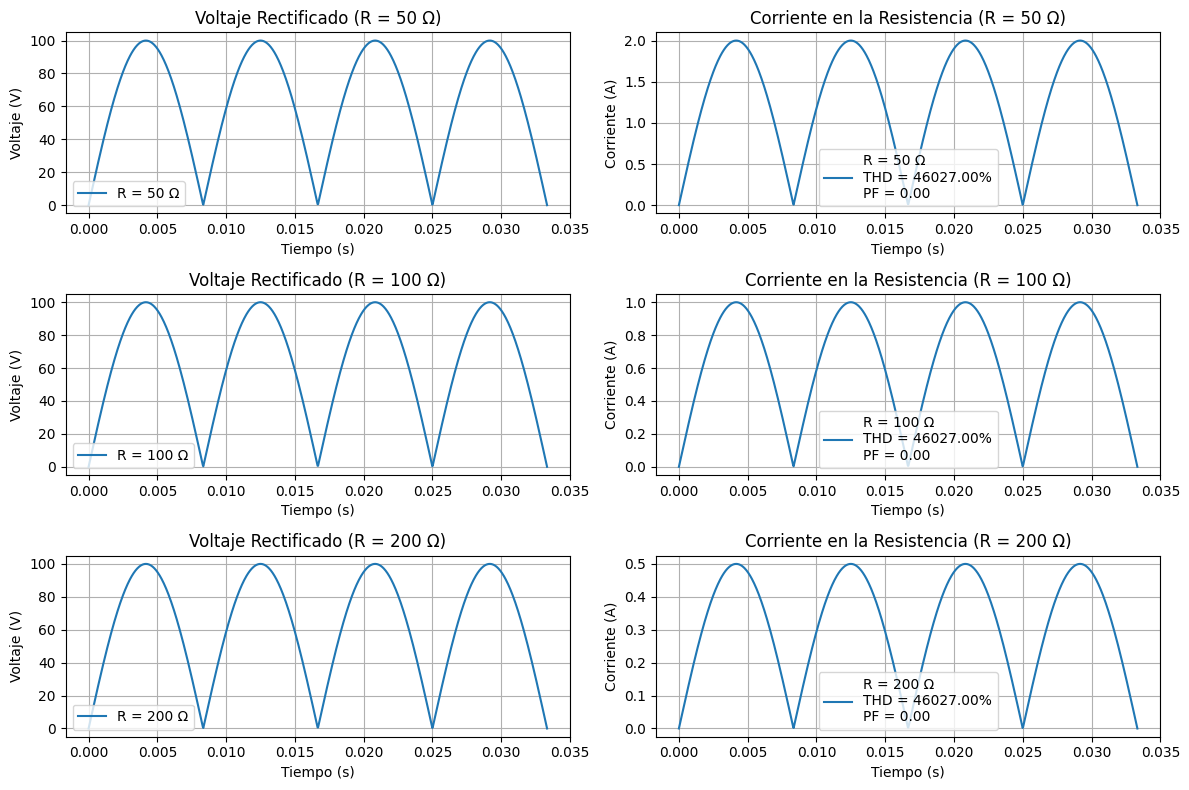

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Parámetros de la simulación
V_m = 100  # Amplitud del voltaje
f = 60     # Frecuencia de la señal (Hz)
w = 2 * np.pi * f  # Velocidad angular
T = 1 / f  # Periodo

t = np.linspace(0, 2 * T, 1000)  # Tiempo para dos ciclos completos

# Función para simular el voltaje rectificado y calcular métricas
def simulate_rectifier(R):
    # Voltaje rectificado
    V_r = V_m * np.abs(np.sin(w * t))

    # Corriente en la resistencia
    I_r = V_r / R

    # FFT de la corriente
    I_fft = fft(I_r)
    I_magnitude = np.abs(I_fft) / len(t)

    # Cálculo de THD
    I_fundamental = I_magnitude[1]  # Componente fundamental
    I_harmonics = np.sqrt(np.sum(I_magnitude[2:]**2))  # Resto de las componentes
    THD = (I_harmonics / I_fundamental) * 100

    # Cálculo del factor de potencia distorsionado
    PF_dist = 1 / np.sqrt(1 + (THD / 100)**2)

    return V_r, I_r, THD, PF_dist

# Resistencias a simular
resistances = [50, 100, 200]

# Gráficas y cálculos
plt.figure(figsize=(12, 8))

for i, R in enumerate(resistances):
    V_r, I_r, THD, PF_dist = simulate_rectifier(R)

    # Gráfica del voltaje rectificado
    plt.subplot(len(resistances), 2, 2 * i + 1)
    plt.plot(t, V_r, label=f"R = {R} Ω")
    plt.title(f"Voltaje Rectificado (R = {R} Ω)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Voltaje (V)")
    plt.grid()
    plt.legend()

    # Gráfica de la corriente
    plt.subplot(len(resistances), 2, 2 * i + 2)
    plt.plot(t, I_r, label=f"R = {R} Ω\nTHD = {THD:.2f}%\nPF = {PF_dist:.2f}")
    plt.title(f"Corriente en la Resistencia (R = {R} Ω)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Corriente (A)")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()
